In [ ]:
import numpy as np
import time
from privacy_leakage.LTM import LTM
from privacy_leakage.alpha_beta_calibratable import alpha_beta_calibratable
from privacy_leakage.DT import DT
import pandas as pd
import pickle


def perturb_distribution(CMF, l):
    CMF_noisy = []
    n = np.shape(CMF)[0]
    for i in range(n):
        # print(i)
        np.random.seed(int((time.time()*1000000)%1000000))
        random_vector = np.ones(n) # np.random.rand(n)
        max_error = 1
        scale_ = n*1.5
        while max_error > l:
            a = (CMF[i,:]+ (random_vector)**4/scale_ )
            a /= sum(a)
            max_error = np.max(np.abs(a - CMF[i,:]))
            scale_ += 0.01
        CMF_noisy.append(a)
    return np.array(CMF_noisy)
        


In [ ]:
eps_list = [0.01, 0.0102, 0.011, 0.05, 0.1, 0.1005, 0.11, 0.2, 0.4995, 0.5005, 0.51, 1, 1.05, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
leakage_DB = []
leakage_actual = []

ALPHBET_SIZE = 10

with open(f'synthetic_datasets/synthetic_CMF_{ALPHBET_SIZE}.pkl', 'rb') as file:
    CMF = pickle.load(file)

for eps in eps_list:
    leakage_actual.append(LTM(eps, CMF)[0])

for eps_0 in [0.01, 0.1, 0.5, 1]:
    leakage_inner = []
    for eps in eps_list:
        leakage_inner.append(Algo2_calibrated_privacy_leakage_final_final(eps_0=eps_0, eps = eps, CMF = CMF, Delta_ = 0, leakage_only = False, DB_value=False)[0])
    leakage_DB.append(leakage_inner)

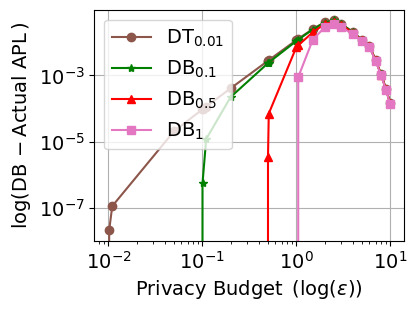

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))

plt.plot(eps_list, np.array(leakage_DB[0]) - np.array(leakage_actual), '-o', color='tab:brown')
plt.plot(eps_list, np.array(leakage_DB[1]) - np.array(leakage_actual), '-*g')
plt.plot(eps_list, np.array(leakage_DB[2]) - np.array(leakage_actual), '-^r')
plt.plot(eps_list, np.array(leakage_DB[3]) - np.array(leakage_actual), '-s', color='tab:pink')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\operatorname{Privacy \text{ } Budget}$ $(\log(\epsilon))$", fontsize=14)
plt.ylabel(r"$\log(\operatorname{DB} - \operatorname{Actual \text{ } APL})$", fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Font size for x-axis numbers
plt.tick_params(axis='y', labelsize=14)  # Font size for y-axis numbers
plt.legend([r"$\operatorname{DT}_{0.01}$", r"$\operatorname{DB}_{0.1}$", r"$\operatorname{DB}_{0.5}$", r"$\operatorname{DB}_{1}$"], fontsize=14)
ax = plt.grid(True)


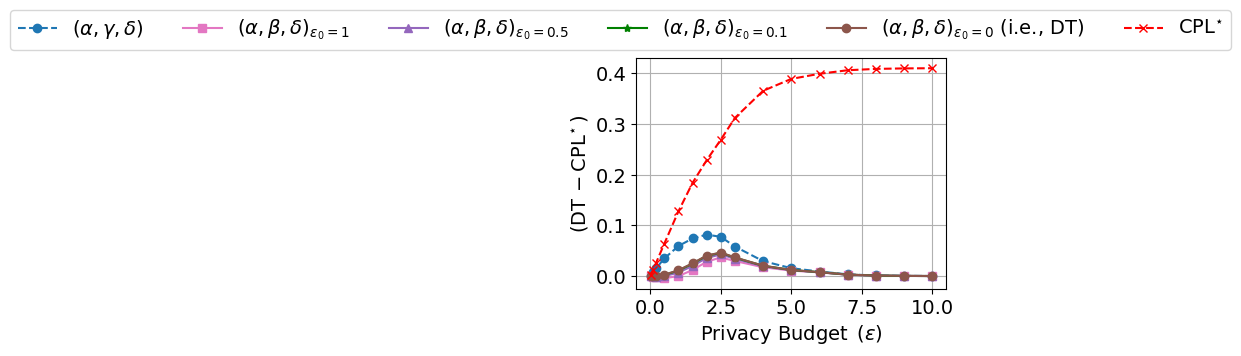

In [ ]:
eps_list = [0.01, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
leakage_DB = []
leakage_actual = []

with open(f'synthetic_datasets/synthetic_CMF_{ALPHBET_SIZE}.pkl', 'rb') as file:
    CMF = pickle.load(file)

for eps in eps_list:
    leakage_actual.append(LTM(eps, CMF)[0])


for eps_0 in [0.01, 0.1, 0.5, 1]:
    leakage_inner = []
    leakage_inner_uncal = []
    for eps in eps_list:
        leakage_inner_uncal.append(DT(eps, CMF = CMF)[0])
        leakage_inner.append(alpha_beta_calibratable(eps_0=eps_0, eps = eps, CMF = CMF, Delta_ = 0)[0])
    leakage_DB.append(leakage_inner)

plt.figure(figsize=(4, 3))
plt.plot(eps_list, np.array(leakage_inner_uncal) - np.array(leakage_actual), '--o')
plt.plot(eps_list, np.array(leakage_DB[3]) - np.array(leakage_actual), '-s', color='tab:pink')
plt.plot(eps_list, np.array(leakage_DB[2]) - np.array(leakage_actual), '-^', color='tab:purple')
plt.plot(eps_list, np.array(leakage_DB[1]) - np.array(leakage_actual), '-*g')
plt.plot(eps_list, np.array(leakage_DB[0]) - np.array(leakage_actual), '-o', color='tab:brown')

plt.xlabel(r"$\operatorname{Privacy \text{ } Budget}$ $(\epsilon)$", fontsize=14)
plt.ylabel(r"$(\operatorname{DT} - \operatorname{CPL}^\star)$", fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Font size for x-axis numbers
plt.tick_params(axis='y', labelsize=14)  # Font size for y-axis numbers
ax = plt.grid(True)


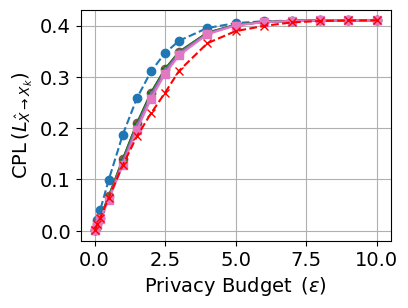

In [ ]:
eps_list = [0.01, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10]
leakage_DB = []
leakage_actual = []

with open(f'synthetic_datasets/synthetic_CMF_{ALPHBET_SIZE}.pkl', 'rb') as file:
    CMF = pickle.load(file)

for eps in eps_list:
    leakage_actual.append(LTM(eps, CMF)[0])

for eps_0 in [0.01, 0.1, 0.5, 1]:
    leakage_inner = []
    leakage_inner_uncal = []
    for eps in eps_list:
        leakage_inner_uncal.append(DT(eps, CMF = CMF)[0])
        leakage_inner.append(Algo2_calibrated_privacy_leakage_final_final(eps_0=eps_0, eps = eps, CMF = CMF, Delta_ = 0, leakage_only = False, DB_value=False)[0])
    leakage_DB.append(leakage_inner)
    
plt.figure(figsize=(4, 3))

plt.plot(eps_list, np.array(leakage_inner_uncal), '--o')
plt.plot(eps_list, np.array(leakage_DB[0]), '-o', color='tab:brown')
plt.plot(eps_list, np.array(leakage_DB[1]), '-*g')
plt.plot(eps_list, np.array(leakage_DB[2]), '-^', color='tab:purple')
plt.plot(eps_list, np.array(leakage_DB[3]), '-s', color='tab:pink')
plt.plot(eps_list, leakage_actual, '--xr')

plt.xlabel(r"$\operatorname{Privacy \text{ } Budget}$ $(\epsilon)$", fontsize=14)
plt.ylabel(r"$\operatorname{CPL } (L_{\hat{X}\rightarrow X_k})$", fontsize=14)
plt.tick_params(axis='x', labelsize=14)  # Font size for x-axis numbers
plt.tick_params(axis='y', labelsize=14)  # Font size for y-axis numbers

ax = plt.grid(True)


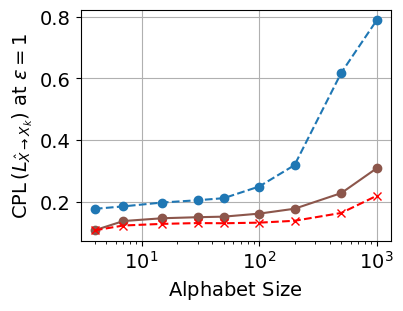

In [ ]:
with open(f'cache/benchmark_alphabet_sizes_APL.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
    alphabet_sizes = loaded_data["alphabet_sizes"]
    leakage_actual = loaded_data["leakage_actual"]
    leakage_DB = loaded_data["leakage_DB"]
    leakage_inner_uncal = loaded_data["leakage_inner_uncal"]

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))

skip_ = [2,3, 5, 13, 17, 20, 70, 300, 700]
final_leakage_DB = []
final_leakage_actual = []
final_leakage_inner_uncal = []
final_alphabey_sizes = []

for index_i, i in enumerate(alphabet_sizes[:20]):
    if i in skip_:
        continue
    final_alphabey_sizes.append(alphabet_sizes[index_i])
    final_leakage_DB.append(leakage_DB[index_i])
    final_leakage_actual.append(leakage_actual[index_i])
    final_leakage_inner_uncal.append(leakage_inner_uncal[index_i])

plt.plot(final_alphabey_sizes, final_leakage_inner_uncal, '--o', color='tab:blue')
plt.plot(final_alphabey_sizes, final_leakage_DB, '-o', color='tab:brown')
plt.plot(final_alphabey_sizes, final_leakage_actual, '--xr')


plt.xlabel(r"$\operatorname{Alphabet \text{ } Size}$", fontsize=14)
plt.ylabel(r"$\operatorname{CPL } (L_{\hat{X}\rightarrow X_k}) \text{ at } \varepsilon=1$", fontsize=14)
plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14) 
ax = plt.grid(True)
plt.xscale('log')


In [65]:
alphabey_sizes

NameError: name 'alphabey_sizes' is not defined

In [ ]:
alphabet_sizes

[2,
 3,
 4,
 5,
 7,
 13,
 15,
 17,
 20,
 30,
 50,
 70,
 100,
 200,
 300,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 50,
 100,
 200,
 500,
 4,
 7,
 15,
 30,
 